# K-Means++
### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

### Read the dataset

In [2]:
coordinates = pd.read_csv("https://raw.githubusercontent.com/jupyter/docker-demo-images/master/datasets/cluster/xclara.csv", index_col=0)
coordinates = coordinates.as_matrix()
coordinates

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

In [3]:
n, feature_size = coordinates.shape
print("Dataset size: ", n)
print("Feature size: ", feature_size)

Dataset size:  3000
Feature size:  2


### Visualize the dataset

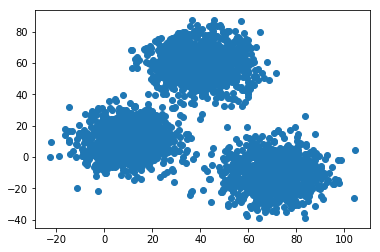

In [4]:
plt.scatter(coordinates[:,0], coordinates[:,1], edgecolors='face')

### Helper functions

In [ ]:
def generate_centroids(K):
    centroids = []
    first_center_index = np.random.randint(0,len(coordinates))
    centroids.append(coordinates[first_center_index])
       
    for i in range(1,K):
        squared_distances = np.zeros(len(coordinates))
        for i in range(len(coordinates)):
            _, dx = nearest_centroid(coordinates[i], centroids)
            squared_distances[i] = dx**2
        weights = squared_distances / np.sum(squared_distances)
        index = np.random.choice(len(coordinates), p=weights)
        centroids.append(coordinates[index])
        
    return centroids

In [ ]:
def centroid_changed(previous, current):
    return not np.array_equal(previous, current)

In [ ]:
def distance(a,b): # euclidean distance
    return np.sqrt(np.sum((a-b)**2))

In [ ]:
def nearest_centroid(data_point, current_centroids):  
    distances = []
    for centroid in current_centroids:
        distances.append(distance(data_point, centroid))
    return np.argmin(distances), np.min(distances)

### K-means algorithm

In [ ]:
def kmeans(coordinates, K, max_iteration):
    current_centroids = generate_centroids(K)
    previous_centroids = None
    cluster = np.zeros(len(coordinates))
    iteration = 1

    fig = plt.figure(figsize=(5,100))

    while centroid_changed(previous_centroids, current_centroids) and iteration <= max_iteration:  
        for i in range(len(coordinates)):
            cluster[i],_ = nearest_centroid(coordinates[i], current_centroids)

        ax = fig.add_subplot(max_iteration,1,iteration)
        ax.set_title(str(iteration) + ". iteration")
        ax.scatter(coordinates[:,0], coordinates[:,1], c=np.copy(cluster), cmap='rainbow', edgecolors='face')
        ax.scatter(np.array(current_centroids)[:,0],np.array(current_centroids)[:,1], s=100, c='k', marker='*', edgecolors='face')

        previous_centroids = np.copy(current_centroids)

        for k in range(K):
            indices = np.where(cluster == k)
            if len(indices[0]) > 0:
                current_centroids[k] = np.mean(coordinates[indices], axis=0)

        iteration += 1

### Run

In [ ]:
kmeans(coordinates, 3, 20)